Epochs :   0%|          | 0/1000 [00:00<?, ?it/s]

Cost at iteration 0: 0.4018154740333557
Cost at iteration 100: 0.18409286439418793
Cost at iteration 200: 0.12677934765815735
Cost at iteration 300: 0.10017412155866623
Cost at iteration 400: 0.08472445607185364
Cost at iteration 500: 0.0744866207242012
Cost at iteration 600: 0.06714899092912674
Cost at iteration 700: 0.061505671590566635
Cost at iteration 800: 0.05706676468253136
Cost at iteration 900: 0.05333816260099411
Cost at iteration 999: 0.050277914851903915


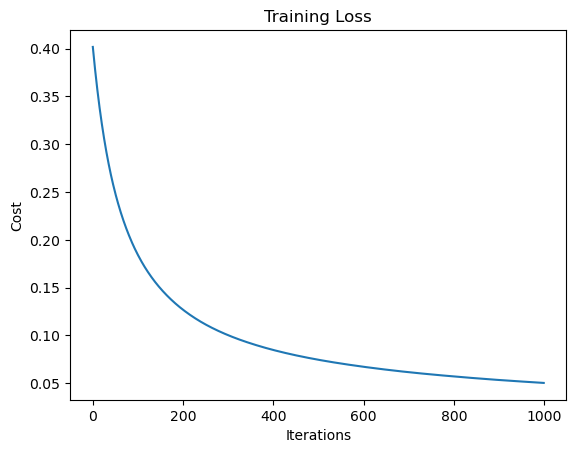

Test Accuracy: 0.9649


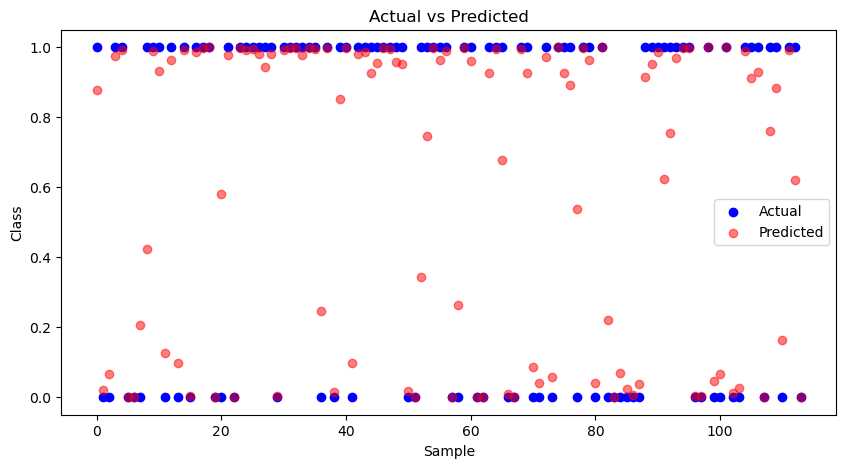

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [3]:
import torch
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nn import NeuralNetwork
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

# Define the neural network architecture
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
layer_dims = [input_size, hidden_size, output_size]

# Create and train the model
model = NeuralNetwork(layer_dims)
costs = model.train(X_train_tensor, y_train_tensor, num_iterations=1000, learning_rate=0.01)

# Plot the training loss
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Loss')
plt.show()

# Evaluate the model on the test set
y_pred = model.predict(X_test_tensor)
y_pred_binary = (y_pred > 0.5).float()

accuracy = (y_pred_binary == y_test_tensor).float().mean()
print(f"Test Accuracy: {accuracy.item():.4f}")

# Plot some predictions
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred.squeeze().detach().numpy(), color='red', alpha=0.5, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Class')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_binary.squeeze().numpy()))

In [4]:
# training the model on gpu
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

model = NeuralNetwork(layer_dims).to(device)

costs = model.train(X_train_tensor, y_train_tensor, num_iterations=1000, learning_rate=0.01)

# Evaluate the model on the test set
y_pred = model.predict(X_test_tensor)
y_pred_binary = (y_pred > 0.5).float()

accuracy = (y_pred_binary == y_test_tensor).float().mean()


print(f"Test Accuracy: {accuracy.item():.4f}")

Epochs :   0%|          | 0/1000 [00:00<?, ?it/s]

Cost at iteration 0: 0.5032644867897034
Cost at iteration 100: 0.27603214979171753
Cost at iteration 200: 0.1646886169910431
Cost at iteration 300: 0.1144721508026123
Cost at iteration 400: 0.08881857246160507
Cost at iteration 500: 0.07370110601186752
Cost at iteration 600: 0.06375401467084885
Cost at iteration 700: 0.05667215958237648
Cost at iteration 800: 0.05104001984000206
Cost at iteration 900: 0.046730246394872665
Cost at iteration 999: 0.04332790896296501
Test Accuracy: 0.9825
